## Notebook Data set "Car Evaluation"

### EDA

In [2]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model, preprocessing

In [3]:
#import data

columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety','classValues'] # reference [1]
dataCarEvaluat = pd.read_csv('./dataAndInfo/car.data', names=columns)

In [4]:
dataCarEvaluat

,buying,maint,doors,persons,lug_boot,safety,classValues
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [5]:
dataCarEvaluat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying         1728 non-null object
maint          1728 non-null object
doors          1728 non-null object
persons        1728 non-null object
lug_boot       1728 non-null object
safety         1728 non-null object
classValues    1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
dataColumns = dataCarEvaluat.columns.values; dataColumns

array(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'classValues'], dtype=object)

In [7]:
# value_counts columns's

n = 0
for i in range(len(dataColumns)):
    col = dataColumns[i]; n +=1
    print('Value counts column ', col , ': ')
    print(dataCarEvaluat[col].value_counts()); print(40*'-')


Value counts column  buying : 
med      432
high     432
low      432
vhigh    432
Name: buying, dtype: int64
----------------------------------------
Value counts column  maint : 
med      432
high     432
low      432
vhigh    432
Name: maint, dtype: int64
----------------------------------------
Value counts column  doors : 
4        432
5more    432
2        432
3        432
Name: doors, dtype: int64
----------------------------------------
Value counts column  persons : 
4       576
more    576
2       576
Name: persons, dtype: int64
----------------------------------------
Value counts column  lug_boot : 
med      576
big      576
small    576
Name: lug_boot, dtype: int64
----------------------------------------
Value counts column  safety : 
med     576
high    576
low     576
Name: safety, dtype: int64
----------------------------------------
Value counts column  classValues : 
unacc    1210
acc       384
good       69
vgood      65
Name: classValues, dtype: int64
-------------

### Preprocessing of Data

In [8]:
# Encoding label

labelEncod = preprocessing.LabelEncoder()

# features
buying = labelEncod.fit_transform(list(dataCarEvaluat['buying']))
maint = labelEncod.fit_transform(list(dataCarEvaluat['maint']))
doors = labelEncod.fit_transform(list(dataCarEvaluat['doors']))
persons = labelEncod.fit_transform(list(dataCarEvaluat['persons']))
lug_boot = labelEncod.fit_transform(list(dataCarEvaluat['lug_boot']))
safety = labelEncod.fit_transform(list(dataCarEvaluat['safety']))

# label
classValues = labelEncod.fit_transform(list(dataCarEvaluat['classValues']))

# Creating a dataFrame with new columns 
packNewColumns = zip(buying,maint,doors, persons, lug_boot, safety,classValues)
dfCar = pd.DataFrame(packNewColumns, columns=['buying','maint','doors','persons','lug_boot','safety','classValues'])

dfCar

,buying,maint,doors,persons,lug_boot,safety,classValues
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [9]:
# creating correlation matrix

correlationMatrix = dfCar.corr()
correlationMatrix


,buying,maint,doors,persons,lug_boot,safety,classValues
buying,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051424
maint,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.040194
doors,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.031327
persons,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.299468
lug_boot,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.033184
safety,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.021044
classValues,0.051424,0.040194,-0.031327,-0.299468,0.033184,-0.021044,1.000000


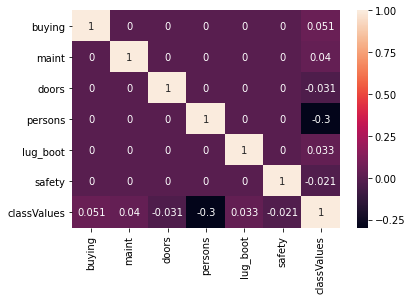

In [10]:
# HeatMap

sn.heatmap(correlationMatrix, annot=True)
plt.show()

### Applyging model ML

In [11]:
# features and Predict/label

label = 'classValues'

#x = np.array(dfCar[['doors']])
x = np.array(dfCar.drop([label],1)) # 1 indica deletar columna label = class values. Outro parâmetro é 0, significando deletar alguma linha.
y = np.array(dfCar[label])



In [16]:
# data train and test

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

# 0.1 indica 10% dos dados para teste, logo, 90% para treino

In [17]:
# applying model, accuracy

model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test) # Aplica model sobre x_test e verifica se o resultado é igual a y_test

print('Accuracy: ',accuracy)


Accuracy:  0.9653179190751445


In [31]:

pred = []

predicted = model.predict(x_test)
names = ['unacc','acc','good','vgood']

for i in range(len(predicted)):
    pred.append([names[predicted[i]], x_test[i], names[y_test[i]]])
    print(names[predicted[i]], x_test[i], names[y_test[i]])
    neighbors, distNeighbors = model.kneighbors([x_test[i]], 9, True)  # neighbors of a given data point
    print('distância Neighbors from the point:', distNeighbors); print(80*'-') # Can be printed out, take a lot of space in print ou.

# model.kneighbors
#This will return to us an array with the index in our data of each neighbor. If distance=True then it will also return the distance to each neighbor from our data point.


dfPred = pd.DataFrame(pred, columns=['Predicted','Features','Real Values'])

good [0 3 1 0 0 1] good
distância Neighbors from the point: [[1444  409  628  924 1508  810 1341 1041 1165]]
--------------------------------------------------------------------------------
good [3 2 3 2 2 1] good
distância Neighbors from the point: [[1531 1536  860   83 1131  791 1426  705 1327]]
--------------------------------------------------------------------------------
good [2 0 1 0 0 2] good
distância Neighbors from the point: [[1452  690  742 1037  233 1168 1271  973  591]]
--------------------------------------------------------------------------------
vgood [1 0 1 2 0 0] vgood
distância Neighbors from the point: [[1245  819  384 1194  121  381  540 1119  101]]
--------------------------------------------------------------------------------
good [0 0 0 1 2 0] unacc
distância Neighbors from the point: [[ 112 1209  495  333 1007  921  553  251  444]]
--------------------------------------------------------------------------------
good [3 1 3 0 0 2] good
distância Neighbors fro

good [1 3 2 0 1 0] good
distância Neighbors from the point: [[ 158  286  551  978  173  226 1188  943  808]]
--------------------------------------------------------------------------------
unacc [1 0 1 2 2 0] unacc
distância Neighbors from the point: [[1448  109 1198  236  556  905  540  560 1196]]
--------------------------------------------------------------------------------
good [2 2 1 0 2 2] good
distância Neighbors from the point: [[ 281  661  159 1526  766 1123  213  309 1418]]
--------------------------------------------------------------------------------
acc [2 1 2 2 2 0] acc
distância Neighbors from the point: [[ 839  106 1253 1231  568  181 1094 1315 1199]]
--------------------------------------------------------------------------------
good [1 3 0 2 2 1] good
distância Neighbors from the point: [[ 326 1318  740  480  778  544  219  485 1424]]
--------------------------------------------------------------------------------
good [3 1 3 0 0 1] good
distância Neighbors from t

In [21]:
# print out dfPred
dfPred

,Predicted,Features,Real Values
0,good,"[0, 3, 1, 0, 0, 1]",good
1,good,"[3, 2, 3, 2, 2, 1]",good
2,good,"[2, 0, 1, 0, 0, 2]",good
3,vgood,"[1, 0, 1, 2, 0, 0]",vgood
4,good,"[0, 0, 0, 1, 2, 0]",unacc
...,...,...,...
168,good,"[2, 2, 1, 0, 2, 2]",good
169,acc,"[2, 1, 2, 2, 2, 0]",acc
170,good,"[1, 3, 0, 2, 2, 1]",good
171,good,"[3, 1, 3, 0, 0, 1]",good


### Some tests

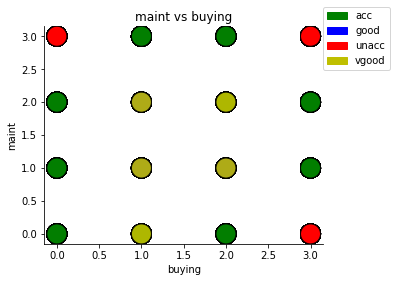

In [150]:

#import matplotlib.patches as mpatches

#fig, ax = plt.subplots(figsize=(5, 4))

#categories = np.array([x for x in classValues]); 
#colors = np.array(['green','blue','red','y'])

#ax.scatter(dfCar['buying'],dfCar['maint'], color=colors[categories], s=400, alpha=0.9, edgecolor='black')

#pop_a = mpatches.Patch(color='green', label='acc')
#pop_b = mpatches.Patch(color='blue', label='good')
#pop_c = mpatches.Patch(color='red', label='unacc')
#pop_d = mpatches.Patch(color='y', label='vgood')

#plt.legend(handles=[pop_a,pop_b,pop_c,pop_d],loc=(1,0.8))

#ax.set_xlabel('buying')
#ax.set_ylabel('maint')
#ax.set_title('maint vs buying')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)


#plt.show()


In [155]:
#dfCar[['buying','classValues']].groupby(['buying']).mean()

,classValues
buying,
0,1.500000
1,1.571759
2,1.474537
3,1.666667


Fontes:

    [1]https://archive.ics.uci.edu/ml/datasets/Car+Evaluation
    [2]https://techwithtim.net/tutorials/machine-learning-python/k-nearest-neighbors-1/
    [3]https://www.science-emergence.com/Articles/How-to-add-a-legend-for-a-scatter-plot-in-matplotlib-/
    [4]https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9
    [5]https://datatofish.com/correlation-matrix-pandas/
    
    